# Tutorial 3 Scalability on Million-Cell Tissue Sections

## 3.1 Quantitative Analysis

In [11]:
!python panel_diagonal_integration_big.py

Namespace(activation='elu', alpha_l=2, attn_drop=0.1, batch_size=4096, beta_l=1, cell_diameter=-1, decoder='linear', deg4feat=False, device=3, drop_edge_rate=0.0, encoder='hgnn', epoch=1, graph_kind='spatial', h5_path1='/home/wcy/code/datasets/Xenium/Human_Breast_IDC_Big1/cell_feature_matrix.h5', h5_path2='/home/wcy/code/datasets/Xenium/Human_Breast_IDC_Big2/cell_feature_matrix.h5', hidden_dim=512, image_encoder='uni', img_batch_size=64, img_path1='/home/wcy/code/datasets/Xenium/Human_Breast_IDC_Big1/Xenium_V1_FFPE_Human_Breast_IDC_Big_1_he_unaligned_image.ome.tif', img_path2='/home/wcy/code/datasets/Xenium/Human_Breast_IDC_Big2/Xenium_V1_FFPE_Human_Breast_IDC_Big_2_he_unaligned_image.ome.tif', in_drop=0.2, linear_prob=True, load_model=False, logging=False, loss_fn='mse', loss_num=6, lr=0.001, mask_gene_rate=0.8, negative_slope=0.2, nei_radius=7, norm='batchnorm', num_heads=4, num_layers=2, num_neighbors=7, num_out_heads=1, obs_path1='/home/wcy/code/datasets/Xenium/Human_Breast_IDC_Big

## 3.2 Qualitative Analysis

### 3.2.1 Spatial gene expression visualization (*FBLN1* and *LUM*)

#### 3.2.1.1 *FBLN1* visualization

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import preprocess as pp
import matplotlib.pyplot as plt

In [10]:
panel_selection = pd.read_csv('./datasets/Big_by_name.csv', index_col=0)
panelA = panel_selection.index[panel_selection['panelA']==1]
panelB = panel_selection.index[panel_selection['panelB']==1]

In [35]:
A2_prime = np.load('./output/big/ours_indirect_panel_A2.npy', allow_pickle=True)
A2_prime = np.vstack(A2_prime)

In [33]:
h5_path = './datasets/Human_Breast_IDC_Big2/cell_feature_matrix.h5'
obs_path = './datasets/Human_Breast_IDC_Big2/cells.csv'
adata_raw = pp.Read_Xenium(h5_path, obs_path)
adata = pp.Preprocess_adata(adata_raw.copy(), selected_genes=panelB)
obs_names = adata.obs_names
adata = pp.Preprocess_adata(adata_raw.copy(), cell_mRNA_cutoff=0, selected_genes=panelA)
adata = adata[obs_names]
adata

/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


View of AnnData object with n_obs × n_vars = 834928 × 140
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p'
    obsm: 'spatial'
    layers: 'raw'

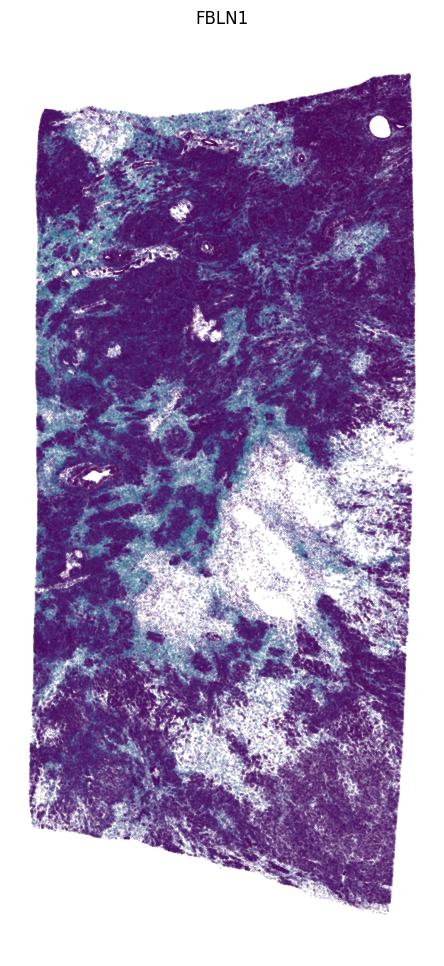

In [36]:
gene_name = 'FBLN1'
gene_idx = np.where(adata.var_names == gene_name)[0]
value = adata[:, gene_name].X
vmax = value.max()
x, y = adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1]

value = A2_prime[:, gene_idx]

fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_alpha(0)  # Set figure background to transparent
plt.scatter(x, y, c=value, vmin=0, vmax=vmax, s=0.01)
ax.set_aspect(1)
plt.title(gene_name)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### 3.2.1.2 *LUM* visualization

In [13]:
h5_path = './datasets/Human_Breast_IDC_Big1/cell_feature_matrix.h5'
obs_path = './datasets/Human_Breast_IDC_Big1/cells.csv'
adata_raw = pp.Read_Xenium(h5_path, obs_path)
adata = pp.Preprocess_adata(adata_raw.copy(), selected_genes=panelA)
obs_names = adata.obs_names
adata = pp.Preprocess_adata(adata_raw.copy(), cell_mRNA_cutoff=0, selected_genes=panelB)
adata = adata[obs_names]
adata

/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


View of AnnData object with n_obs × n_vars = 836616 × 140
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p'
    obsm: 'spatial'
    layers: 'raw'

In [14]:
B1_prime = np.load('./output/big/ours_indirect_panel_B1.npy', allow_pickle=True)
B1_prime = np.vstack(B1_prime)

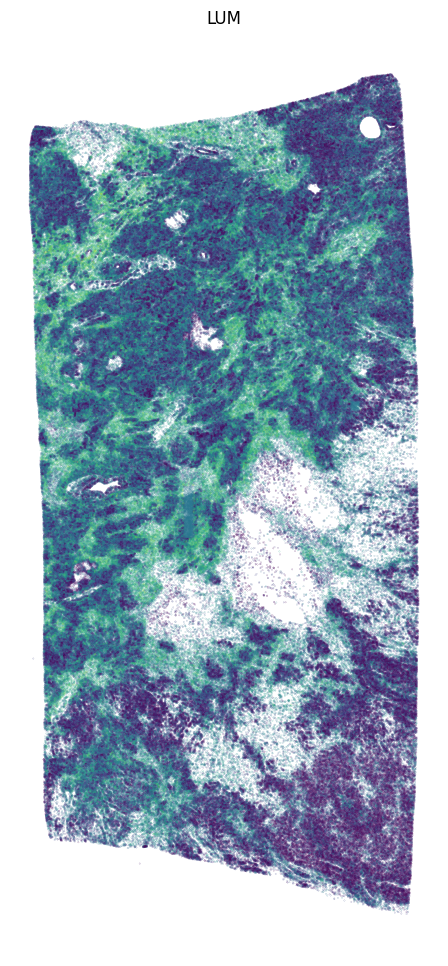

In [31]:
gene_name = 'LUM'
gene_idx = np.where(adata.var_names == gene_name)[0]
value = adata[:, gene_name].X
vmax = value.max()
x, y = adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1]

value = B1_prime[:, gene_idx]

fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_alpha(0)  # Set figure background to transparent
plt.scatter(x, y, c=value, vmin=0, vmax=vmax, s=0.01)
ax.set_aspect(1)
plt.title(gene_name)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### 3.2.2 Spatial domain indentification

In [38]:
h5_path = './datasets/Human_Breast_IDC_Big1/cell_feature_matrix.h5'
obs_path = './datasets/Human_Breast_IDC_Big1/cells.csv'
adata = pp.Read_Xenium(h5_path, obs_path)
adata = pp.Preprocess_adata(adata, selected_genes=panelA)
obs1 = pd.read_csv('./output/cellcharter/Big/Human_Breast_IDC_Big1SpatialEx_New_all.csv', index_col=0)
obs1 = obs1.iloc[:adata.n_obs]
adata.obs = obs1

/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/wcy/anaconda3/envs/torch2X/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [39]:
color_dict = {0: '#6b6ecf',
 3: '#f7b6d2',
 6: '#7b4173',
 5: '#ffbb78',
 11: '#c49c94',
 1: '#ff7f0e',
 10: '#d6616b',  
 7: '#EEDD82',
 16: '#B3EE3A',
 9: '#CD3278',
 14: '#aa40fc',
 4: '#1f77b4',
 12: '#17becf',
 13: '#279e68',
 8: '#FFD700',
 15: '#66CD00',
 2: '#9ACD32'}

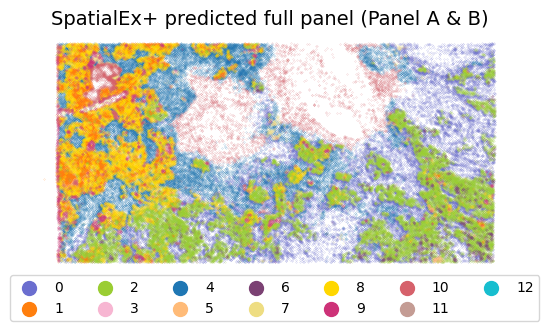

In [43]:
x, y = adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1]
domain_list = adata.obs['cluster_cellcharter'].values
roi_selection = (adata.obsm['spatial'][:, 1]// 5000) == 1
selection = (adata.obsm['spatial'][:, 1]// 5000) == 1
x, y, domain_list = x[roi_selection], y[roi_selection], domain_list[selection]
domain_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for domain in domain_order:
    domain_selection = (domain_list == domain)
    plt.scatter(x[domain_selection], y[domain_selection], c=color_dict[domain], s=0.01, label=domain)
    # plt.show()
    
plt.legend(loc='lower center', borderaxespad=0.,bbox_to_anchor=(0.51, -0.2), ncol=7,
           scatterpoints=1, markerscale=100)
ax = plt.gca()
ax.set_aspect(1)
plt.axis('off')
plt.title('SpatialEx+ predicted full panel (Panel A & B)', fontsize=14)
plt.show()